# Association Rules — Groceries Basket (mlxtend)

PyCaret 3.x no longer ships `pycaret.arules`, so we use `mlxtend.frequent_patterns` to generate rules.

## Environment
Python 3.11 with `pycaret==3.3.0` (no `pycaret.arules`), so association rules use `mlxtend` (Apriori) instead. Data expected in `../data/Groceries_dataset.csv`.

In [3]:
%pip install mlxtend==0.23.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

csv_path = "../data/Groceries_dataset.csv"
df = pd.read_csv(csv_path)
print(df.head())
print(df['itemDescription'].nunique(), 'unique items')

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
167 unique items


In [5]:
# Group items per member to create transaction lists
transactions = df.groupby('Member_number')['itemDescription'].apply(list)
print('Transactions:', len(transactions))

# One-hot encode transactions
te = TransactionEncoder()
encoded = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(encoded, columns=te.columns_)
print('Basket shape:', basket.shape)

Transactions: 3898
Basket shape: (3898, 167)


In [6]:
# Mine frequent itemsets and derive rules
itemsets = apriori(basket, min_support=0.001, use_colnames=True)
itemsets = itemsets.sort_values('support', ascending=False)
print(itemsets.head())

rules = association_rules(itemsets, metric='confidence', min_threshold=0.05)
rules = rules.sort_values(['lift', 'confidence'], ascending=False)
print(rules.head())

# Save outputs for README
itemsets.to_csv('frequent_itemsets.csv', index=False)
rules.to_csv('association_rules.csv', index=False)

      support            itemsets
161  0.458184        (whole milk)
100  0.376603  (other vegetables)
119  0.349666        (rolls/buns)
135  0.313494              (soda)
162  0.282966            (yogurt)
                                               antecedents  \
1644472  (root vegetables, long life bakery product, do...   
1644511                               (coffee, meat, pork)   
1644476  (pork, long life bakery product, domestic eggs...   
1644507                    (coffee, meat, root vegetables)   
1644479        (coffee, meat, root vegetables, whole milk)   

                                               consequents  \
1644472                               (coffee, meat, pork)   
1644511  (root vegetables, long life bakery product, do...   
1644476                    (coffee, meat, root vegetables)   
1644507  (pork, long life bakery product, domestic eggs...   
1644479    (pork, long life bakery product, domestic eggs)   

         antecedent support  consequent support   

/Users/varad/Projects/CMPE-255-Sec-47-Data-Mining/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/varad/Projects/CMPE-255-Sec-47-Data-Mining/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/varad/Projects/CMPE-255-Sec-47-Data-Mining/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


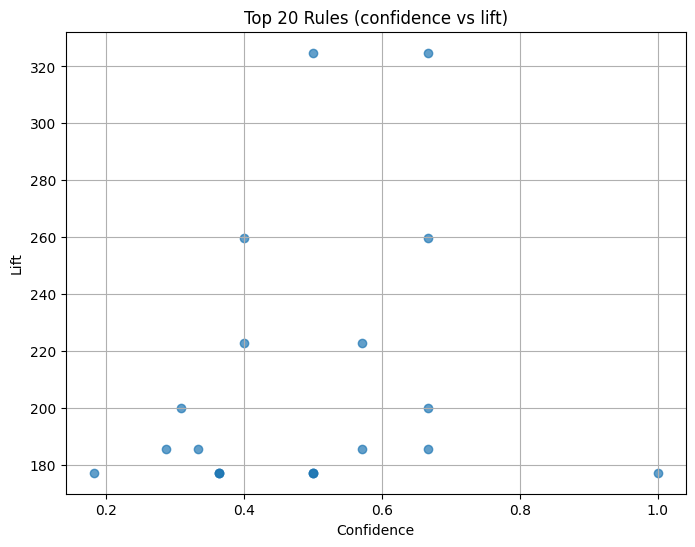

In [7]:
# Quick visualization: top 20 rules by lift vs confidence
top_rules = rules.head(20)
plt.figure(figsize=(8,6))
plt.scatter(top_rules['confidence'], top_rules['lift'], alpha=0.7)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Top 20 Rules (confidence vs lift)')
plt.grid(True)
plt.savefig('rules_scatter.png', dpi=150, bbox_inches='tight')
plt.show()